# What have we learned so far?
---

1. Python
  - Assigning variables
  - Working with data types
  - Calling functions
  - Defining functions
  - If... elif... else...
  - For i in np.arange...
2. Arrays
  - Creating arrays (same type!)
  - Operations between arrays (add, mult)
  - Adding elements to arrays (using np.append)
3. Tables
  - Reading tables
  - Creating new tables
  - Grabbing data from columns
  - Creating a copy with additional columns
  - Creating a copy with only certain columns
  - Creating a copy with only certain rows
  - Creating a copy with rows grouped on a column and a collection function
  - Creating a pivot table on two columns and a collection function
  - Applying a function that takes the elements in a column(s) as parameters
4. Plots
  - Creating bar charts from 'category' and 'y' columns
  - Creating scatter plots and line plots from 'x' and 'y' columns
  - Creating histograms to count occurrences/density
5. Correlation/Causation/Statistics
  - Definition of correlation
  - Definition of causation
  - Does correlation imply causation?
  - Some ways to poke holes in an argument
  - How to measure probability (chance of...)

---

So... that's a lot of stuff when you write it out, but you'll be getting a cheat-sheet with the syntax of any functions we've used.  All you need to know is what they do and what they're useful for.

# Before we begin: Any questions about anything in class?
---

We don't necessarily need to get through this entire notebook, you can treat it more as a practice test that we're doing together.

What's most important is that we're all solid on the information covered in lecture, that way we can figure out how to apply it to various datasets and find answers to questions!

Anything and everything that you're unclear about, ask about it now!  No need to be shy, there are definitely others worried about the same thing.

In [1]:
from datascience import *
import numpy as np
%matplotlib inline

In [2]:
[1, 3.4, "string", True, Table()]

[1, 3.4, 'string', True, ]

In [3]:
my_arr = make_array(1, 2, 3)
my_arr

array([1, 2, 3])

In [4]:
my_arr = np.append(my_arr, 4)

my_arr

array([1, 2, 3, 4])

In [5]:
arr = make_array()

for i in np.arange(10):
    # do something
    arr = np.append(arr, i)
    
arr

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

# Tonight's Dataset:
---

From kaggle user Randi H Griffin:
>This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.
>
>Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.
Content
>
>The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
>
>1. ID - Unique number for each athlete  
>2. Name - Athlete's name  
>3. Sex - M or F  
>4. Age - Integer  
>5. Height - In centimeters  
>6. Weight - In kilograms  
>7. Team - Team name  
>8. NOC - National Olympic Committee 3-letter code  
>9. Games - Year and season  
>10. Year - Integer  
>11. Season - Summer or Winter  
>12. City - Host city  
>13. Sport - Sport  
>14. Event - Event  
>15. Medal - Gold, Silver, Bronze, or NA  


# Getting the data
---

It's in a file called `athlete_events.csv`

In [6]:
data = Table.read_table("athlete_events.csv")

In [7]:
data

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,nan
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
3,Gunnar Nielsen Aaby,M,24,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,nan
4,Edgar Lindenau Aabye,M,34,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",nan
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan


I think it might be annoying to have the non-staggered years prior to 1992.  So let's look at only years after 1992.

In [8]:
data = data.where("Year", are.above(1992))

In [9]:
data

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan
6,Per Knut Aaland,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan
7,John Aalberg,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan
7,John Aalberg,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan
7,John Aalberg,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan


Alright.  We got rid of a lot data (and notice that we got rid of many of Christine Jacoba Aaftink's games), but it should be more manageable now.

Also, while we're at it, let's ignore rows with "mismatched" values.  You don't *need* to know how this next code block works, but feel free to follow along.

In [10]:
nans = np.argwhere(np.isnan(data.column("Age")))
data.take(nans[:3]).show() # This line is just to show us what these mismatched rows look like
print("We're getting rid of rows like these!")
data = data.exclude(nans.flatten())

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
[14130],['Grayson Hugh Bourne'],['M'],[nan],[nan],[nan],['Great Britain'],['GBR'],['1996 Summer'],[1996],['Summer'],['Atlanta'],['Canoeing'],"[""Canoeing Men's Kayak Doubles, 1,000 metres""]",['nan']
[19504],['Cha Yong-Hwa'],['F'],[nan],[145.],[39.],['North Korea'],['PRK'],['2008 Summer'],[2008],['Summer'],['Beijing'],['Gymnastics'],"[""Gymnastics Women's Individual All-Around""]",['nan']
[19504],['Cha Yong-Hwa'],['F'],[nan],[145.],[39.],['North Korea'],['PRK'],['2008 Summer'],[2008],['Summer'],['Beijing'],['Gymnastics'],"[""Gymnastics Women's Uneven Bars""]",['nan']


We're getting rid of rows like these!


# Repeat Participants vs One-Timers
---

Who showed up multiple times?  Who only showed up once?

Can we get a table of just those people and their data?

In [11]:
# Let's get how many times each person was in the dataset
counts = data.group("Name")
counts

Name,count
"Gabrielle Marie ""Gabby"" Adcock (White-)",1
Th Anh,1
Th Ngn Thng,7
A Lamusi,1
"A. J. Tyronne Benildus ""Benny"" Fernando",1
"A. Joshua ""Josh"" West",2
Aa Bela Joaquim,1
Aadam Ismaeel Khamis,1
Aadjijatmiko Finarsih H.,1
Aagje Vanwalleghem,5


How do add that counts column to our table of full data?  *Hint: Something you learned on Tuesday.*

In [12]:
# How to get just the names that have count > 1?
# We can join counts to our original dataset!

data_with_counts = data.join("Name", counts, "Name")
data_with_counts.sort("ID")

Name,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,count
A Lamusi,2,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,1
Christine Jacoba Aaftink,5,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan,2
Christine Jacoba Aaftink,5,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan,2
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,4
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan,4
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,4
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,4


And now we want just the data of people who were repeat participants.

In [13]:
# Now as simple as a where above statement

data_with_counts.where("count", are.above(1))

Name,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,count
Th Ngn Thng,29843,F,19,147,47,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,nan,7
Th Ngn Thng,29843,F,19,147,47,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Floor Exercise,nan,7
Th Ngn Thng,29843,F,19,147,47,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Horse Vault,nan,7
Th Ngn Thng,29843,F,19,147,47,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Uneven Bars,nan,7
Th Ngn Thng,29843,F,19,147,47,Vietnam,VIE,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Balance Beam,nan,7
Th Ngn Thng,29843,F,23,147,47,Vietnam,VIE,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Women's Uneven Bars,nan,7
Th Ngn Thng,29843,F,23,147,47,Vietnam,VIE,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,nan,7
"A. Joshua ""Josh"" West",129771,M,27,207,105,Great Britain,GBR,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Coxed Eights,nan,2
"A. Joshua ""Josh"" West",129771,M,31,207,105,Great Britain,GBR,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Men's Coxed Eights,Silver,2
Aagje Vanwalleghem,125174,F,16,155,43,Belgium,BEL,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Individual All-Around,nan,5


# Beginning Age --> Repeat or One-Timer?
---

Can we tell if you'll participate in the Olympics again based on your age?

In [14]:
# If someone showed up multiple times they were probability pretty young at their first match, right?
# Let's find the avg min age of these repeat participants, and compare it to avg age of one-time participants

repeats = data_with_counts.where("count", are.above(1))
onetimes = data_with_counts.where("count", 1)

repeats.sort("ID")

Name,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,count
Christine Jacoba Aaftink,5,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan,2
Christine Jacoba Aaftink,5,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan,2
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,4
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan,4
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,4
Per Knut Aaland,6,M,33,188,75,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pursuit,nan,4
John Aalberg,7,M,33,183,72,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres Relay,nan,4


In [15]:
# How will we take avg of min ages for all participants?
# Let's first select the columns we need
min_ages_repeats = repeats.select("Name", "Age").group("Name", min)

# Why don't we need to do any of that here?
ages_onetimes = onetimes.select("Name", "Age")

min_ages_repeats

Name,Age min
Th Ngn Thng,19
"A. Joshua ""Josh"" West",27
Aagje Vanwalleghem,16
Aarn Sarmiento Padilla,21
Aaron Arthur Cook,17
Aaron Brown,20
Aaron Gate,21
"Aaron J. ""AJ"" Bear",25
Aaron John McIntosh,24
Aaron March,23


In [16]:
# Now as simple as comparing the means of the Age columns in the two tables
avg_min_age_repeats = np.mean(min_ages_repeats.column("Age min"))
avg_ages_onetimes = np.mean(ages_onetimes.column("Age"))

print("Average Beginning Age of Repeat Participants:", avg_min_age_repeats)
print("Average Age of One-Time Participants:", avg_ages_onetimes)

Average Beginning Age of Repeat Participants: 23.711244207397044
Average Age of One-Time Participants: 25.109634444587464


# Age distributions
---

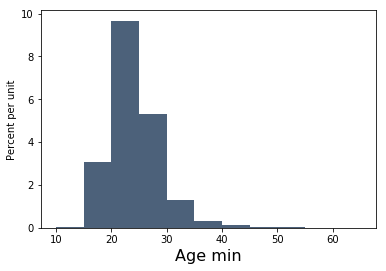

In [17]:
# Hmm... not as different as I would have expected.

# Let's plot the ditributions to look into this further

min_ages_repeats.hist("Age min", bins=np.arange(10, 70, 5))

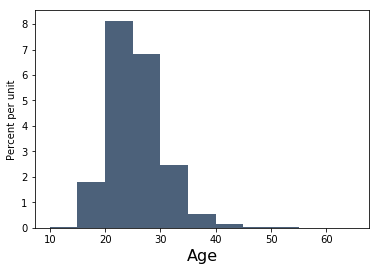

In [18]:
ages_onetimes.hist("Age", bins=np.arange(10, 70, 5))

In [19]:
# I want to overlay these, so let's put them in the same table

ages = Table().with_columns(
    "Repeats", min_ages_repeats.column("Age min"),
    "Onetimers", ages_onetimes.column("Age")
)

ValueError: Column length mismatch. New column does not have the same number of rows as table.

There's another way to do it, you don't need to worry about matplotlib, but we will focus on the histograms.

So, pay attention here, this is important!

In [20]:
# Don't worry about these next code blocks, just focus on the histograms they create
import matplotlib.pyplot as plt

([array([5.07148166e-04, 3.09360381e-02, 9.66641892e-02, 5.32680453e-02,
         1.30721812e-02, 3.26148734e-03, 1.45149303e-03, 5.42123902e-04,
         2.01110480e-04, 5.24636034e-05, 4.37196695e-05]),
  array([2.63869224e-04, 1.80139014e-02, 8.13360793e-02, 6.83421290e-02,
         2.45655812e-02, 5.43184451e-03, 1.40301197e-03, 4.69815935e-04,
         1.28716695e-04, 3.21791736e-05, 1.28716695e-05])],
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
 <a list of 2 Lists of Patches objects>)

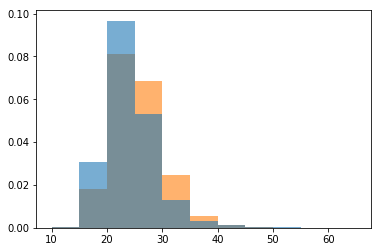

In [21]:
plt.hist(
    [min_ages_repeats.column("Age min"), ages_onetimes.column("Age")],
    bins=np.arange(10, 70, 5),
    normed=True,
    histtype="stepfilled", alpha=0.6
)

([array([5.8000e+01, 3.5380e+03, 1.1055e+04, 6.0920e+03, 1.4950e+03,
         3.7300e+02, 1.6600e+02, 6.2000e+01, 2.3000e+01, 6.0000e+00,
         5.0000e+00]),
  array([4.1000e+01, 2.7990e+03, 1.2638e+04, 1.0619e+04, 3.8170e+03,
         8.4400e+02, 2.1800e+02, 7.3000e+01, 2.0000e+01, 5.0000e+00,
         2.0000e+00])],
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
 <a list of 2 Lists of Patches objects>)

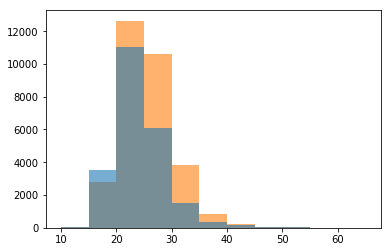

In [22]:
# What if we were to change normed to false?
plt.hist(
    [min_ages_repeats.column("Age min"), ages_onetimes.column("Age")],
    bins=np.arange(10, 70, 5),
    normed=False,
    histtype="stepfilled", alpha=0.6
)

Gah!

Why are these two histograms so different?  Shouldn't we expect the same shape?

In [23]:
# They're different because:

"""

They have different "population" sizes.  The number of repeats != num onetimers.


"""

'\n\nThey have different "population" sizes.  The number of repeats != num onetimers.\n\n\n'

# Misleading arguments
---

Let's create a misleading argument, together.

Due to the difference between the normed and count histogram, we can come up with something supported by normed but disproven by count!

In [24]:
# How about:

"""

If you're 20-25, then you're almost 25% more likely to be a repeat
than to be a onetimer.


"""

0.08 * 1.25


0.1

What percent of repeats/one-timers are 20-25?

Let's recall the axis label *"percent per unit"*

**Unit = Bin Size**

Then, there's some math
$$"percent\ per\ unit"=\frac{percent}{bin\_size}$$

$$"percent\ per\ unit" *\ bin\_size=percent$$

In [25]:
# So, the percent of repeats that were 20-25 at their first game is:

0.1 * 5 * 100 # Don't forget, this is a percent so we should multiply by 100

50.0

In [26]:
# And the percent of one-timers that were 20-25 is:

0.08 * 5 * 100 # Again, multiply by 100

40.0

But what are those percents out of?

In [27]:
# The percent of repeats is out of:
"""
How many repeats there have been

"""

# The percent of one-timers is out of:
"""
How many onetimers there have been

"""

'\nHow many onetimers there have been\n\n'

So how would we find the *number* of repeats between 20-25 at their first game versus the *number* of one-tiemrs between 20-25?

In [28]:
# To turn percent into a count we:
"""
Multiply proportion by the population size

"""

'\nMultiply proportion by the population size\n\n'

In [29]:
# Some code to get the "population sizes" of `min_ages_repeats` and `ages_onetimes`
# and multiply by the proportion
num_repeats_2025 = 0.5 * min_ages_repeats.num_rows
num_onetimes_2025 = 0.4 * ages_onetimes.num_rows

print(num_repeats_2025, num_onetimes_2025)

11437.0 12430.400000000001


Let's take a look at our count histogram again.

([array([5.8000e+01, 3.5380e+03, 1.1055e+04, 6.0920e+03, 1.4950e+03,
         3.7300e+02, 1.6600e+02, 6.2000e+01, 2.3000e+01, 6.0000e+00,
         5.0000e+00]),
  array([4.1000e+01, 2.7990e+03, 1.2638e+04, 1.0619e+04, 3.8170e+03,
         8.4400e+02, 2.1800e+02, 7.3000e+01, 2.0000e+01, 5.0000e+00,
         2.0000e+00])],
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]),
 <a list of 2 Lists of Patches objects>)

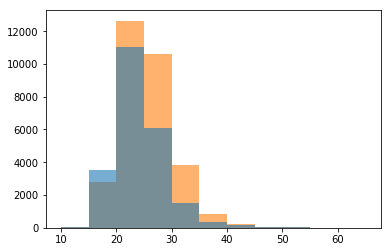

In [30]:
plt.hist(
    [min_ages_repeats.column("Age min"), ages_onetimes.column("Age")],
    bins=np.arange(10, 70, 5),
    normed=False,
    histtype="stepfilled", alpha=0.6
)

So, if you're 20-25, are you more likely to be a repeat or a one-timer?

How do you know this, and why might it be the case?

In [31]:
# Our answer goes here
"""

More likely to be a one-timer because there are more
one-timers in the 20-25 bin than there are repeats.

This means that the chance of...

"""

'\n\nMore likely to be a one-timer because there are more\none-timers in the 20-25 bin than there are repeats.\n\nThis means that the chance of...\n\n'

# Let's assign points to each country
---

Let's say we're assigning points to each country based on the number of Golds, Silvers, and Bronzes they've won.

Medals are with the following amount of points:

<pre>
  Gold    +5 pts
  Silver  +3 pts
  Bronze  +2 pts
  nan     -1 pts
</pre>

In [34]:
# How are we going to do this?


In [35]:
def medal_to_points(medal):
    if medal == "Gold":
        return 5
    elif medal == "Silver":
        return 3
    elif medal == "Bronze":
        return 2
    else:
        return -1
    
# medal_to_points("Gold") => 5

Okay, now we need to apply that function to our table.

What does `apply` return again?  And how will we use what it returns?

In [36]:
data_with_points = data.with_column(
    "Points", data.apply(medal_to_points, "Medal")
)

data_with_points.sort("Medal")

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Points
16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2
20,Kjetil Andr Aamodt,M,22,176,85,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,2
37,Ann Kristin Aarnes,F,23,182,64,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,2
62,Giovanni Abagnale,M,21,198,90,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,2
63,Jos Luis Abajo Gmez,M,30,194,87,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze,2
65,Patimat Abakarova,F,21,165,49,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,2
143,"Desmond ""Des"" Abbott",M,21,184,87,Australia,AUS,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,Bronze,2
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,2
250,Saeid Morad Abdevali,M,26,170,80,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze,2
395,Jennifer Abel,F,20,160,62,Canada,CAN,2012 Summer,2012,Summer,London,Diving,Diving Women's Synchronized Springboard,Bronze,2


If we only care about the country and the points, do we need to work with this entire table?

In [37]:
# Select relevant columns
country_points = data_with_points.select("NOC", "Points")
country_points

NOC,Points
CHN,-1
NED,-1
NED,-1
USA,-1
USA,-1
USA,-1
USA,-1
USA,-1
USA,-1
USA,-1


Now, how do we find the total amount of points scored by each country?

In [38]:
# Group by country
scores = country_points.group("NOC", sum)

scores = scores.relabeled("Points sum", "Points")

scores.sort("Points", descending=True)

NOC,Points
USA,2711
RUS,109
NED,102
JAM,91
CUB,91
PAR,5
ETH,0
KOS,-2
SSD,-3
TUV,-7


We may need to change "Team" to "NOC"... why is that?

Cool!  Look's like we're at the top :)

What happens if we change our function to weight the medals differently?

# What are the points of the top 5 countries over time?
---

This one might be a doozy, so let's work through it together.

First, let's start by choosing 5 countries and only working with their data.  This will make things a bit more manageable.  Just as we found out before, we should use NOC.

In [39]:
included_countries = ["USA", "CHN", "RUS", "GBR", "GER"]

We have already added points to the entire dataset based on the Medal placement, so let's just get our countries from that `data_with_points` table.

In [40]:
# We might be tempted to use where,
countries = data_with_points.where("NOC", are.in(included_countries))
# But such a predicate does not exist.

SyntaxError: invalid syntax (<ipython-input-40-34c531ae9a51>, line 2)

In [41]:
# We ran into this before... we can use what instead?
inc_countries = Table().with_column("NOC", included_countries)

countries = data_with_points.join("NOC", inc_countries, "NOC")

countries

NOC,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Points
CHN,2,A Lamusi,M,23,170,60,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,nan,-1
CHN,602,Abudoureheman,M,22,182,75,China,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,nan,-1
CHN,1463,Ai Linuer,M,25,160,62,China,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",nan,-1
CHN,1464,Ai Yanhan,F,14,168,54,China,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,nan,-1
CHN,1464,Ai Yanhan,F,14,168,54,China,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,nan,-1
CHN,3605,An Weijiang,M,22,178,72,China,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,nan,-1
CHN,3605,An Weijiang,M,22,178,72,China,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",nan,-1
CHN,3610,An Yulong,M,19,173,70,China,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,3
CHN,3610,An Yulong,M,19,173,70,China,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",nan,-1
CHN,3610,An Yulong,M,19,173,70,China,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres Relay",Bronze,2


Since our data is time-specific, we should make sure that we're keeping it sorted by date.

In [42]:
countries = countries.sort("Year")
countries

NOC,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,Points
CHN,20240,Chen Lu,F,17,162,52,China,1994 Winter,1994,Winter,Lillehammer,Figure Skating,Figure Skating Women's Singles,Bronze,2
CHN,54754,Ji Xiaoou,F,13,158,58,China,1994 Winter,1994,Winter,Lillehammer,Freestyle Skiing,Freestyle Skiing Women's Aerials,nan,-1
CHN,54878,Jin Hua,F,21,166,60,China,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,nan,-1
CHN,54878,Jin Hua,F,21,166,60,China,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",nan,-1
CHN,69393,Li Jiajun,M,18,174,76,China,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,nan,-1
CHN,69393,Li Jiajun,M,18,174,76,China,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",nan,-1
CHN,69393,Li Jiajun,M,18,174,76,China,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres Relay",nan,-1
CHN,69436,Li Lianli,M,19,174,77,China,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,nan,-1
CHN,69436,Li Lianli,M,19,174,77,China,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",nan,-1
CHN,69436,Li Lianli,M,19,174,77,China,1994 Winter,1994,Winter,Lillehammer,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres Relay",nan,-1


We should also limit our data to just what we want.

In [43]:
countries = countries.select("Year", "NOC", "Points")
countries

Year,NOC,Points
1994,CHN,2
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1
1994,CHN,-1


Now we get to try out a handy-dandy new method that we learned recently: `.groups`.

This takes multiple column names and gives us every unique row of Col_1 and Col_2.

For example, let's try out `.groups` on a simple table first.

In [44]:
tbl = Table().with_columns(
    "Alph", ["A", "A", "A", "B", "B", "C"],
    "Numb", [1, 2, 3, 4, 4, 1],
    "Data_1", [5.8, 2.6, 4.4, 9.8, 10.2, 4.3],
    "Data_2", ["yellow", "blue", "red", "blue", "green", "red"]
)

tbl

Alph,Numb,Data_1,Data_2
A,1,5.8,yellow
A,2,2.6,blue
A,3,4.4,red
B,4,9.8,blue
B,4,10.2,green
C,1,4.3,red


In [45]:
tbl.groups(["Alph", "Numb"])

Alph,Numb,count
A,1,1
A,2,1
A,3,1
B,4,2
C,1,1


Alrighty, back to our Olympics data!

For every year we want every NOC.  So, the columns that we pass into `.groups` should probably be those.

For every year and NOC we probably want the total amount of points that country got that year.  What collection function should we use?

In [46]:
points = countries.groups(["Year", "NOC"], sum)
points

Year,NOC,Points sum
1994,CHN,-33
1994,GBR,-42
1994,GER,0
1994,RUS,-30
1994,USA,-154
1996,CHN,7
1996,GBR,-291
1996,GER,-93
1996,RUS,-54
1996,USA,463


What is a better way to view this table?

In [47]:
# What if we want a "Year" column, and then a column for every NOC?

# Then, we want the values to be the total points for that year for that NOC.

# Does this layout sound familiar to something?
points = countries.pivot("NOC", "Year", "Points", sum)
points

Year,CHN,GBR,GER,RUS,USA
1994,-33,-42,0,-30,-154
1996,7,-291,-93,-54,463
1998,-37,-33,-7,33,-103
2000,-37,-167,-97,224,413
2002,-49,-37,25,-103,30
2004,-53,-113,23,164,489
2006,-96,-50,-7,-100,-131
2008,97,-59,-119,1,679
2010,-40,-72,-28,-181,49
2012,104,-132,-66,60,547


Now, how do we get the total points *so far* of each country?  Let's move outside of the table for now, and work with numpy a bit.

In [48]:
# Let's get the total points so far for each year for China.
np.cumsum(points.column("CHN"))

array([ -33,  -26,  -63, -100, -149, -202, -298, -201, -241, -137, -197,
       -189])

So, let's replace each column in our table with the cumulative sum data like we just calculated!

In [49]:
chn = np.cumsum(points.column("CHN"))
usa = np.cumsum(points.column("USA"))
rus = np.cumsum(points.column("RUS"))
gbr = np.cumsum(points.column("GBR"))
ger = np.cumsum(points.column("GER"))

In [50]:
points = points.with_columns([
    "CHN", chn,
    "USA", usa,
    "RUS", rus,
    "GBR", gbr,
    "GER", ger
])

points

Year,CHN,GBR,GER,RUS,USA
1994,-33,-42,0,-30,-154
1996,-26,-333,-93,-84,309
1998,-63,-366,-100,-51,206
2000,-100,-533,-197,173,619
2002,-149,-570,-172,70,649
2004,-202,-683,-149,234,1138
2006,-298,-733,-156,134,1007
2008,-201,-792,-275,135,1686
2010,-241,-864,-303,-46,1735
2012,-137,-996,-369,14,2282


And finally, we plot!  We want to plot cumulative score for each country over time.

What type of plot would work best here—for time-based data?

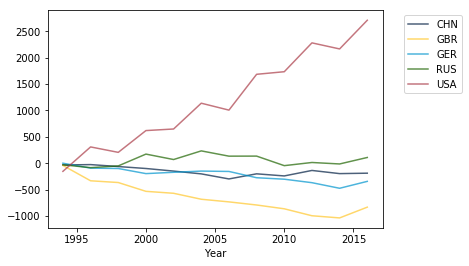

In [51]:
points.plot("Year")

# This will be posted online.  Best of luck on the midterm!